<a href="https://colab.research.google.com/github/hudanjhh/SECB4313/blob/main/BMS_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

In [3]:
data_path = '/content/drive/My Drive/Bio Modelling & Simulation/Breast Cancer for Group Project/'

In [4]:
features = pd.read_csv(data_path + 'SVMRFE.csv')
target = pd.read_csv(data_path + 'omic_class.csv')

In [6]:
counter = Counter(target['Label'])
counter

Counter({1: 353, 4: 42, 2: 132, 5: 31, 3: 113})

In [7]:
print(target['Label'].value_counts())

Label
1    353
2    132
3    113
4     42
5     31
Name: count, dtype: int64


In [8]:
feature = features.iloc[:,1:-1]

In [21]:
targets = target['Label']

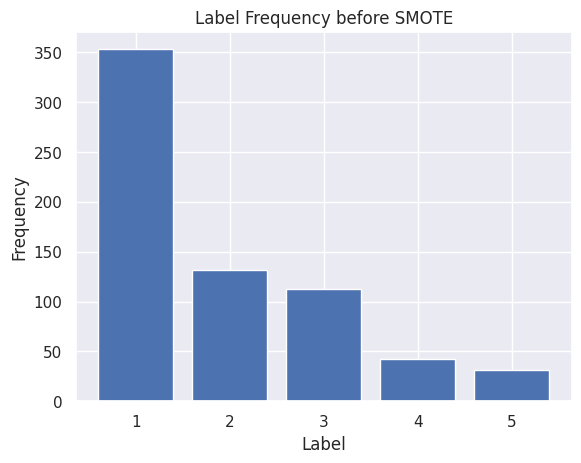

In [38]:
labels, values = zip(*counter.items())

plt.bar(labels, values)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Label Frequency before SMOTE')
plt.show()

In [23]:
x_train, x_test, y_train, y_test = train_test_split(feature, targets, test_size=0.25, random_state=42, stratify=targets)
print("X TRAIN DATA SHAPE: ", x_train.shape)
print("X TEST DATA SHAPE: ", x_test.shape)
print("Y TRAIN DATA SHAPE: ", y_train.shape)
print("Y TEST DATA SHAPE: ", y_test.shape)

X TRAIN DATA SHAPE:  (503, 12000)
X TEST DATA SHAPE:  (168, 12000)
Y TRAIN DATA SHAPE:  (503,)
Y TEST DATA SHAPE:  (168,)


In [24]:
sm = SMOTE(k_neighbors=1, random_state=42)
X, Y = sm.fit_resample(x_train, y_train)
print ('Shape of oversampled data: {}'.format(X.shape))
print ('Shape of Y: {}'.format(Y.shape))

Shape of oversampled data: (1325, 12000)
Shape of Y: (1325,)


In [28]:
print('Resampled dataset shape for Train {}'.format(Counter(Y)))
print('Normal validation dataset shape for Test {}'.format(Counter(y_test)))

Resampled dataset shape for Train Counter({4: 265, 1: 265, 3: 265, 2: 265, 5: 265})
Normal validation dataset shape for Test Counter({1: 88, 2: 33, 3: 28, 4: 11, 5: 8})


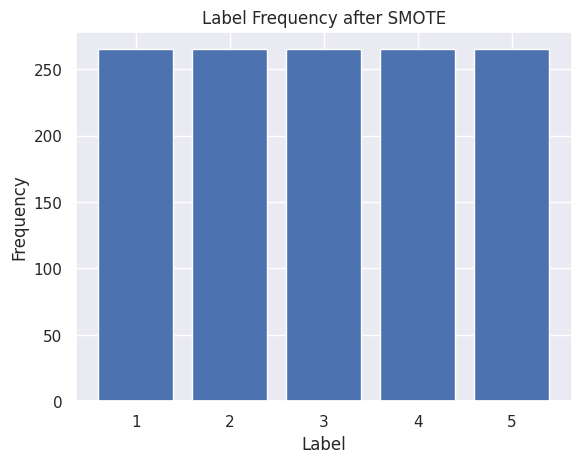

In [37]:
counterY = Counter(Y)

labels, values = zip(*counterY.items())

plt.bar(labels, values)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Label Frequency after SMOTE')
plt.show()

In [40]:
X

,0,1,2,4,5,13,19,29,39,40,...,352.2,353.2,354.2,355.2,356.2,357.2,358.2,360.2,366.2,367.2
0,0.829938,0.873489,0.720650,0.499927,0.179374,0.178149,0.466799,0.561806,0.663034,0.048416,...,0.776755,0.768797,0.396853,0.404824,0.295255,0.450300,0.263430,0.379559,0.573803,0.558419
1,0.906756,0.319657,0.910657,0.897176,0.056533,0.025590,0.296119,0.944712,0.535522,0.019927,...,0.415613,0.390498,0.238520,0.258105,0.246033,0.670111,0.622165,0.150556,0.540387,0.667434
2,0.790936,0.502351,0.864792,0.727273,0.039491,0.041154,0.124461,0.812274,0.541190,0.070665,...,0.285057,0.274406,0.406931,0.426710,0.408107,0.366593,0.731951,0.474923,0.614920,0.529153
3,0.719355,0.750200,0.873112,0.427564,0.124184,0.103862,0.344040,0.336781,0.527717,0.032646,...,0.364570,0.346397,0.431968,0.455171,0.426208,0.304004,0.213781,0.544679,0.681292,0.504957
4,0.176970,0.816073,0.826323,0.489889,0.560941,0.038689,0.348106,0.326231,0.393801,0.038127,...,0.315222,0.283072,0.472805,0.491500,0.572209,0.336763,0.192725,0.386353,0.656180,0.617546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,0.730408,0.852678,0.858491,0.611783,0.172328,0.075027,0.593402,0.773332,0.675080,0.057700,...,0.384122,0.348658,0.235271,0.259330,0.372248,0.217810,0.264610,0.290575,0.688063,0.344304
1321,0.458837,0.832438,0.772314,0.417069,0.232068,0.065283,0.507193,0.689289,0.461494,0.164872,...,0.207148,0.172343,0.379971,0.388415,0.252996,0.353145,0.264150,0.266228,0.655745,0.502052
1322,0.465361,0.828955,0.426621,0.556025,0.398128,0.075414,0.230707,0.609913,0.273748,0.221672,...,0.683295,0.673787,0.330036,0.354145,0.473884,0.491147,0.265515,0.217051,0.706359,0.697207
1323,0.808758,0.858632,0.861168,0.610715,0.127290,0.061316,0.643792,0.790206,0.761364,0.061061,...,0.386480,0.346945,0.238521,0.258459,0.346571,0.210210,0.327784,0.291970,0.679364,0.316204


In [41]:
Y

0       4
1       1
2       1
3       3
4       1
       ..
1320    5
1321    5
1322    5
1323    5
1324    5
Name: Label, Length: 1325, dtype: int64

In [42]:
smote = pd.concat([X, Y], axis=1)

In [43]:
smote

,0,1,2,4,5,13,19,29,39,40,...,353.2,354.2,355.2,356.2,357.2,358.2,360.2,366.2,367.2,Label
0,0.829938,0.873489,0.720650,0.499927,0.179374,0.178149,0.466799,0.561806,0.663034,0.048416,...,0.768797,0.396853,0.404824,0.295255,0.450300,0.263430,0.379559,0.573803,0.558419,4
1,0.906756,0.319657,0.910657,0.897176,0.056533,0.025590,0.296119,0.944712,0.535522,0.019927,...,0.390498,0.238520,0.258105,0.246033,0.670111,0.622165,0.150556,0.540387,0.667434,1
2,0.790936,0.502351,0.864792,0.727273,0.039491,0.041154,0.124461,0.812274,0.541190,0.070665,...,0.274406,0.406931,0.426710,0.408107,0.366593,0.731951,0.474923,0.614920,0.529153,1
3,0.719355,0.750200,0.873112,0.427564,0.124184,0.103862,0.344040,0.336781,0.527717,0.032646,...,0.346397,0.431968,0.455171,0.426208,0.304004,0.213781,0.544679,0.681292,0.504957,3
4,0.176970,0.816073,0.826323,0.489889,0.560941,0.038689,0.348106,0.326231,0.393801,0.038127,...,0.283072,0.472805,0.491500,0.572209,0.336763,0.192725,0.386353,0.656180,0.617546,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,0.730408,0.852678,0.858491,0.611783,0.172328,0.075027,0.593402,0.773332,0.675080,0.057700,...,0.348658,0.235271,0.259330,0.372248,0.217810,0.264610,0.290575,0.688063,0.344304,5
1321,0.458837,0.832438,0.772314,0.417069,0.232068,0.065283,0.507193,0.689289,0.461494,0.164872,...,0.172343,0.379971,0.388415,0.252996,0.353145,0.264150,0.266228,0.655745,0.502052,5
1322,0.465361,0.828955,0.426621,0.556025,0.398128,0.075414,0.230707,0.609913,0.273748,0.221672,...,0.673787,0.330036,0.354145,0.473884,0.491147,0.265515,0.217051,0.706359,0.697207,5
1323,0.808758,0.858632,0.861168,0.610715,0.127290,0.061316,0.643792,0.790206,0.761364,0.061061,...,0.346945,0.238521,0.258459,0.346571,0.210210,0.327784,0.291970,0.679364,0.316204,5


In [44]:
smote.to_csv(data_path + 'smote.csv', index=False)